# Capitalization Table

The capitalization table, often called the cap table, tracks ownership in a startup. During rounds of financing, it will get updated to reflect what new ownership has been allocated. We will work through a few examples and create ways to track historical owernship, measure dilution of shares, and see how the valuation evolves over time.

## The Cap Table at Inception

When a company is first created, the shares can be allocated however the founders want to. For example, if the founders have fronted the cost of the startup, they may allocate shares to themselves as well as an allocation to be given to employees to incentivize them. Let's say that the two founders, Michael and Sean, decide to each take 1500 shares and then reserve 1000 shares to be given to employees.

In [1]:
import pandas as pd

cap_table = pd.DataFrame([['Michael', 1500],
['Sean', 1500],
['Employees', 1000]], columns = ['Investor', 'Shares'])

print(cap_table)

    Investor  Shares
0    Michael    1500
1       Sean    1500
2  Employees    1000


The owernship in the company for each party equals the number of shares divided by the total number of shares outstanding. We can add that column easily.

In [2]:
cap_table['% Ownership'] = cap_table['Shares'] / cap_table['Shares'].sum()
print(cap_table)

    Investor  Shares  % Ownership
0    Michael    1500        0.375
1       Sean    1500        0.375
2  Employees    1000        0.250


Before we receive any funding, we can't know what the value of the company is. So until we are able to give a price per share, we can use a null value for the share price and value.

In [3]:
import numpy as np
cap_table['Price'] = np.NaN
cap_table['Value'] = np.NaN
print(cap_table)

    Investor  Shares  % Ownership  Price  Value
0    Michael    1500        0.375    NaN    NaN
1       Sean    1500        0.375    NaN    NaN
2  Employees    1000        0.250    NaN    NaN


## The First Valuation

The first time we will know a price to give to the shares is once money is raised. If investors put forward I amount of money, for a stake of S in the company, than the valuation of the company should be I/S.

$ V_{POST} = \frac{I}{S}$

where 

$ V_{POST} = \text{Post-money Valuation}$

$ I = \text{The amount of investment}$

$ S = \text{The ownership stake for investors}$

For example, if $100,000 is given for a 20% stake in a company, we can calculate what the valuation of the company is implied to be.

In [4]:
investment = 100000
stake = .2
post_money_valuation = investment / stake
print(post_money_valuation)

500000.0


## Pre-Money Valuation

If we have the valuation after the money has been invested, we can find what the implied valuation without the investment would be based on simply subtracting it out.

$ V_{PRE} = V_{POST} - I $

where 

$ V_{PRE} = \text{Pre-money Valuation}$

$ V_{POST} = \text{Post-money Valuation}$

$ I = \text{The amount of investment}$

Using our example from before, the valuation for the company prior to receiving the new capital would be $400,000.

In [5]:
pre_money_valuation = post_money_valuation - investment
print(pre_money_valuation)

400000.0


The other way that we could work through fund raising is when investors come to the pre-money valuation first and then decide on the shares they want to purchase. In this case, if we have the pre-money valuation and the investment that the investor wants to put in we can find the share they will own as:

$ S = \frac{I}{V_{PRE} + I}$

where 

$ V_{PRE} = \text{Pre-money Valuation}$

$ I = \text{The amount of investment}$

$ S = \text{The ownership stake for investors}$

In [6]:
#Find the share
pre_money_valuation = 400000
I = 100000
S = I / (pre_money_valuation + I)
print(S)

0.2


## Share Price

Using the cap table, prior to counting the investment, we could back out what the share price must be given the pre-money valuation and shares outstanding.

$ V_{PRE} = S * P $

where 

$ V_{PRE} = \text{Pre-money Valuation}$

$ S = \text{Number of shares prior to new investors}$

$ P = \text{Price of shares}$

In [7]:
#Find the total number of shares
total_shares = cap_table['Shares'].sum()

#Calculate the implied share price
share_price = pre_money_valuation / total_shares
print(share_price)

100.0


In [8]:
#Now we could calculate the value of shares pre-money
cap_table['Price'] = share_price
cap_table['Value'] = share_price * cap_table['Shares']
print(cap_table)

    Investor  Shares  % Ownership  Price     Value
0    Michael    1500        0.375  100.0  150000.0
1       Sean    1500        0.375  100.0  150000.0
2  Employees    1000        0.250  100.0  100000.0


## New Shares

To calculate the number of new shares that will be created and given to investors is simple. It is the investment divided by the implied share price.

$ S_{NEW} = \frac{I}{P} $

where

$ S_{NEW} = \text{The number of newly created shares} $

$ I = \text{The amount of investment}$

$ P = \text{Price of shares}$

In [9]:
#Calculate new shares
new_shares = investment / share_price
print(new_shares)

1000.0


In [10]:
#Add in the newly created shares to the cap table
cap_table.loc[3] = ['XYZ Capital', new_shares, np.NaN, share_price, np.NaN]
print(cap_table)

      Investor  Shares  % Ownership  Price     Value
0      Michael  1500.0        0.375  100.0  150000.0
1         Sean  1500.0        0.375  100.0  150000.0
2    Employees  1000.0        0.250  100.0  100000.0
3  XYZ Capital  1000.0          NaN  100.0       NaN


In [11]:
#Recalculate the % ownership and values
cap_table['% Ownership'] = cap_table['Shares'] / cap_table['Shares'].sum()
cap_table['Price'] = share_price
cap_table['Value'] = share_price * cap_table['Shares']
print(cap_table)

      Investor  Shares  % Ownership  Price     Value
0      Michael  1500.0          0.3  100.0  150000.0
1         Sean  1500.0          0.3  100.0  150000.0
2    Employees  1000.0          0.2  100.0  100000.0
3  XYZ Capital  1000.0          0.2  100.0  100000.0


You will notice already that the owernships of all other parties have been diluted. This naturally happens as more investment in the company is added.

## Second Round of Investment

What if a new investor comes along and wants a 20% stake as well, but is willing to pay double and invest $200,000 in? Calculating the post-money valuation, we see that the valuation of the company has doubled!

In [12]:
investment = 200000
stake = .2
post_money_valuation = investment / stake
print(post_money_valuation)

1000000.0


The pre-money valuation has also grown! Prior to this investment, the value was \\$500,000 distributed between the founders, employees and XYZ capital. Now, the pre-money valuation is \\$800,000 meaning the company created $300,000 worth of value between the two rounds of financing!

In [13]:
#Calculate the pre-money valuation
pre_money_valuation = post_money_valuation - investment
print(pre_money_valuation)

800000.0


Equivalently, the investor might have come in and said they believed the company was worth 800K and wanted to get a 20%, we can calculate it by re-arranging some of the terms.

$ S = \frac{I}{V_{PRE} + I}$

$ S*(V_{PRE} + I) = I$

$ S*V_{PRE} = (1-S)*I$

$ I = \frac{S*V_{PRE}}{1-S}$


where 

$ V_{PRE} = \text{Pre-money Valuation}$

$ I = \text{The amount of investment}$

$ S = \text{The ownership stake for investors}$

In [14]:
#Confirm the investment amount comes out to the same thing
pre_money_valuation = 800000
s = .2
I = (s * pre_money_valuation)/(1-s)
print(I)

200000.0


In [15]:
#Find the share price
total_shares = cap_table['Shares'].sum()
share_price = pre_money_valuation / total_shares
print(share_price)

160.0


Notice in both the case of the valuation and the share price, the implied growth between the rounds of financing for all parties was 60%.

In [16]:
print(share_price/100-1)
print(pre_money_valuation/500000-1)

0.6000000000000001
0.6000000000000001


In [17]:
#Once again figure out how many new shares are created
new_shares = investment / share_price
print(new_shares)

1250.0


In [18]:
#Update the cap table
cap_table.loc[4] = ['ABC Capital', new_shares, np.NaN, share_price, np.NaN]
cap_table['Price'] = share_price
cap_table['% Ownership'] = cap_table['Shares'] / cap_table['Shares'].sum()
cap_table['Value'] = cap_table['Shares'] * cap_table['Price']
print(cap_table)

      Investor  Shares  % Ownership  Price     Value
0      Michael  1500.0         0.24  160.0  240000.0
1         Sean  1500.0         0.24  160.0  240000.0
2    Employees  1000.0         0.16  160.0  160000.0
3  XYZ Capital  1000.0         0.16  160.0  160000.0
4  ABC Capital  1250.0         0.20  160.0  200000.0


While all other parties have been diluted, the value of their investments has actually grown. The amount of dilution can be found by considering that if a x% stake is sold to investors, then (1-x)% of each investors stake must be diluted to support it. For investors who are not getting new owernship, we can calculated their diluted ownership like so:

$ O_{POST} = O_{PRE} * (1- S) $

where

$O_{POST} = \text{Ownerhsip Percent after Latest Round}$ 

$O_{PRE} = \text{Ownerhsip Percent prior to Latest Round}$ 

$S = \text{The stake being sold to new investors}$ 

For example, XYZ Capital had a 20% stake before, but after has a 16% stake.

In [19]:
print(.2 * (1-.2))

0.16000000000000003


We can finally confirm that the post-money valuation matches the total value in the cap table after including the new investor.

In [20]:
print(cap_table['Value'].sum())

1000000.0


## Creating Functions to Track Cap Tables

Instead of doing this over and over again, we can create a function which takes a current cap table as well as the new investor information and returns what the new cap table will look like.

In [21]:
import pandas as pd

#Start with our basic cap table
cap_table = pd.DataFrame([['Michael', 1500],
['Sean', 1500],
['Employees', 1000]], columns = ['Investor', 'Shares'])
cap_table['% Ownership'] = cap_table['Shares'] / cap_table['Shares'].sum()
cap_table['Price'] = np.NaN
cap_table['Value'] = np.NaN

Our inputs would be the total amount raised and the amount owernship that is going to be given after creation of new shares.

In [22]:
#Create our inputs
total_raised = 100000
post_ownership = {"ABC Capital": .1,
                 "XYZ Capital": .1}

To make it easier to understand, we will break down each part of the function to see how it all flows. One new thing that we are going to control for is the case where an investor who is already invested in the company decides to increase their stake. We need to consolidate their previous stake and new stake in this case.

In [23]:
#Create a copy of the table to update with
new_cap_table = cap_table.copy()

In [24]:
#Find the valuations
new_ownership = sum(post_ownership.values())
post_money_valuation = total_raised / new_ownership
pre_money_valuation = post_money_valuation - total_raised
    
print(new_ownership)
print(post_money_valuation)
print(pre_money_valuation)

0.2
500000.0
400000.0


In [25]:
#Compute the price
total_shares = cap_table['Shares'].sum()
share_price = pre_money_valuation / total_shares
print(share_price)

100.0


In [26]:
#Create a dataframe to track the newly created shares
post_ownership = pd.Series(post_ownership).reset_index()
post_ownership.columns = ["Investor", "% Ownership"]
post_ownership['Shares'] = post_ownership["% Ownership"] * post_money_valuation / share_price
print(post_ownership)

      Investor  % Ownership  Shares
0  ABC Capital          0.1   500.0
1  XYZ Capital          0.1   500.0


In [27]:
#Combine the old and new data, and group by the investor name to get the total shares (to consolidate)
new_cap_table = pd.concat([new_cap_table, post_ownership])
new_cap_table = new_cap_table.groupby("Investor")['Shares'].sum()
new_cap_table = new_cap_table.reset_index()
print(new_cap_table)

      Investor  Shares
0  ABC Capital   500.0
1    Employees  1000.0
2      Michael  1500.0
3         Sean  1500.0
4  XYZ Capital   500.0


In [28]:
#Add back in the columns for price, value and percent ownership
new_cap_table['Price'] = share_price
new_cap_table['Value'] = new_cap_table['Price'] * new_cap_table['Shares']
new_cap_table['% Ownership'] = new_cap_table['Shares'] / new_cap_table['Shares'].sum()
print(new_cap_table)

      Investor  Shares  Price     Value  % Ownership
0  ABC Capital   500.0  100.0   50000.0          0.1
1    Employees  1000.0  100.0  100000.0          0.2
2      Michael  1500.0  100.0  150000.0          0.3
3         Sean  1500.0  100.0  150000.0          0.3
4  XYZ Capital   500.0  100.0   50000.0          0.1


In [29]:
#Put it all into a function
def update_cap_table(cap_table, total_raised, post_ownership):
    #Create a copy of the table to update with
    new_cap_table = cap_table.copy()
    
    #Find the valuations
    new_ownership = sum(post_ownership.values())
    post_money_valuation = total_raised / new_ownership
    pre_money_valuation = post_money_valuation - total_raised
    
    #Compute the price
    total_shares = cap_table['Shares'].sum()
    share_price = pre_money_valuation / total_shares
    
    #Create a dataframe to track the newly created shares
    post_ownership = pd.Series(post_ownership).reset_index()
    post_ownership.columns = ["Investor", "% Ownership"]
    post_ownership['Shares'] = post_ownership["% Ownership"] * post_money_valuation / share_price
    
    #Combine the old and new data, and group by the investor name to get the total shares (to consolidate)
    new_cap_table = pd.concat([new_cap_table, post_ownership])
    new_cap_table = new_cap_table.groupby("Investor")['Shares'].sum()
    new_cap_table = new_cap_table.reset_index()
    
    #Add back in the columns for price, value and percent ownership
    new_cap_table['Price'] = share_price
    new_cap_table['Value'] = new_cap_table['Price'] * new_cap_table['Shares']
    new_cap_table['% Ownership'] = new_cap_table['Shares'] / new_cap_table['Shares'].sum()
    return new_cap_table
cap_table = pd.DataFrame([['Michael', 1500],
['Sean', 1500],
['Employees', 1000]], columns = ['Investor', 'Shares'])
cap_table['% Ownership'] = cap_table['Shares'] / cap_table['Shares'].sum()
cap_table['Price'] = np.NaN
cap_table['Value'] = np.NaN
total_raised = 100000
post_ownership = {"ABC Capital": .1,
                 "XYZ Capital": .1}
print(update_cap_table(cap_table, total_raised, post_ownership))

      Investor  Shares  Price     Value  % Ownership
0  ABC Capital   500.0  100.0   50000.0          0.1
1    Employees  1000.0  100.0  100000.0          0.2
2      Michael  1500.0  100.0  150000.0          0.3
3         Sean  1500.0  100.0  150000.0          0.3
4  XYZ Capital   500.0  100.0   50000.0          0.1


Now that we have created a function to update our cap tables, we can try it with a few rounds of financing. This function will make the process automated and much easier! We will track all the cap tables over time as well to see the evolution.

In [30]:
cap_table = pd.DataFrame([['Michael', 1500],
['Sean', 1500],
['Employees', 1000]], columns = ['Investor', 'Shares'])
cap_table['% Ownership'] = cap_table['Shares'] / cap_table['Shares'].sum()
cap_table['Price'] = np.NaN
cap_table['Value'] = np.NaN


historical_cap_tables = [cap_table]

total_raised = 100000
post_ownership = {"ABC Capital": .1,
                 "XYZ Capital": .1}
cap_table = update_cap_table(cap_table, total_raised, post_ownership)
historical_cap_tables.append(cap_table)

total_raised = 200000
post_ownership = {"ABC Capital": .1,
                 "M Ventures": .05}
cap_table = update_cap_table(cap_table, total_raised, post_ownership)
historical_cap_tables.append(cap_table)

total_raised = 500000
post_ownership = {"ABC Capital": .05,
                 "M Ventures": .05,
                 "ABC Capital": .05}
cap_table = update_cap_table(cap_table, total_raised, post_ownership)
historical_cap_tables.append(cap_table)

total_raised = 1000000
post_ownership = {"ABC Capital": .025,
                 "Growth Fund": .025}
cap_table = update_cap_table(cap_table, total_raised, post_ownership)
historical_cap_tables.append(cap_table)
print(historical_cap_tables)

[    Investor  Shares  % Ownership  Price  Value
0    Michael    1500        0.375    NaN    NaN
1       Sean    1500        0.375    NaN    NaN
2  Employees    1000        0.250    NaN    NaN,       Investor  Shares  Price     Value  % Ownership
0  ABC Capital   500.0  100.0   50000.0          0.1
1    Employees  1000.0  100.0  100000.0          0.2
2      Michael  1500.0  100.0  150000.0          0.3
3         Sean  1500.0  100.0  150000.0          0.3
4  XYZ Capital   500.0  100.0   50000.0          0.1,       Investor       Shares       Price          Value  % Ownership
0  ABC Capital  1088.235294  226.666667  246666.666667        0.185
1    Employees  1000.000000  226.666667  226666.666667        0.170
2   M Ventures   294.117647  226.666667   66666.666667        0.050
3      Michael  1500.000000  226.666667  340000.000000        0.255
4         Sean  1500.000000  226.666667  340000.000000        0.255
5  XYZ Capital   500.000000  226.666667  113333.333333        0.085,       Inve

The first thing to track is how the ownership changes over time. If we pull the column for ownernship from each of the historical cap tables, we begin to see the evolution. First let's look at what we are pulling out with list comprehension.

In [31]:
historical_owernship = [x.set_index('Investor')['% Ownership'] for x in historical_cap_tables]
print(historical_owernship)

[Investor
Michael      0.375
Sean         0.375
Employees    0.250
Name: % Ownership, dtype: float64, Investor
ABC Capital    0.1
Employees      0.2
Michael        0.3
Sean           0.3
XYZ Capital    0.1
Name: % Ownership, dtype: float64, Investor
ABC Capital    0.185
Employees      0.170
M Ventures     0.050
Michael        0.255
Sean           0.255
XYZ Capital    0.085
Name: % Ownership, dtype: float64, Investor
ABC Capital    0.2165
Employees      0.1530
M Ventures     0.0950
Michael        0.2295
Sean           0.2295
XYZ Capital    0.0765
Name: % Ownership, dtype: float64, Investor
ABC Capital    0.230675
Employees      0.145350
Growth Fund    0.025000
M Ventures     0.090250
Michael        0.218025
Sean           0.218025
XYZ Capital    0.072675
Name: % Ownership, dtype: float64]


Now, we concat these together and transpose them (so that the columns correspond to the different inevstors). 

In [32]:
historical_owernship = [x.set_index('Investor')['% Ownership'] for x in historical_cap_tables]
historical_owernship = pd.concat(historical_owernship, axis=1).transpose()
print(historical_owernship)

              Michael      Sean  Employees  ABC Capital  XYZ Capital  \
% Ownership  0.375000  0.375000    0.25000          NaN          NaN   
% Ownership  0.300000  0.300000    0.20000     0.100000     0.100000   
% Ownership  0.255000  0.255000    0.17000     0.185000     0.085000   
% Ownership  0.229500  0.229500    0.15300     0.216500     0.076500   
% Ownership  0.218025  0.218025    0.14535     0.230675     0.072675   

             M Ventures  Growth Fund  
% Ownership         NaN          NaN  
% Ownership         NaN          NaN  
% Ownership     0.05000          NaN  
% Ownership     0.09500          NaN  
% Ownership     0.09025        0.025  


Finally, let's reset the index (dropping it) because it is all labeled the same, and fillna with 0 to denote that if there is no value, it should be 0% ownernship.

In [33]:
historical_owernship = [x.set_index("Investor")['% Ownership'] for x in historical_cap_tables]
historical_owernship = pd.concat(historical_owernship, axis=1).transpose()
historical_owernship = historical_owernship.reset_index(drop=True).fillna(0)
print(historical_owernship)

    Michael      Sean  Employees  ABC Capital  XYZ Capital  M Ventures  \
0  0.375000  0.375000    0.25000     0.000000     0.000000     0.00000   
1  0.300000  0.300000    0.20000     0.100000     0.100000     0.00000   
2  0.255000  0.255000    0.17000     0.185000     0.085000     0.05000   
3  0.229500  0.229500    0.15300     0.216500     0.076500     0.09500   
4  0.218025  0.218025    0.14535     0.230675     0.072675     0.09025   

   Growth Fund  
0        0.000  
1        0.000  
2        0.000  
3        0.000  
4        0.025  


Plotting the ownership that different parties have over time really drives home how these rounds of financing have led to dilution for many parties that were not increasing their stakes in the rounds.

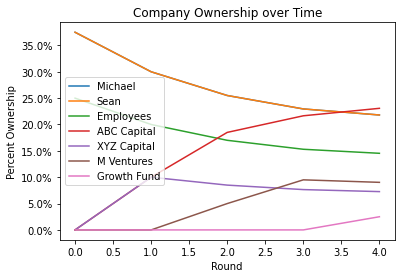

In [34]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

ax = historical_owernship.plot(kind='line')
ax.set_xlabel("Round")
ax.set_ylabel("Percent Ownership")

ax.set_title("Company Ownership over Time")
ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

In [35]:
historical_value = [x.set_index("Investor")['Value'] for x in historical_cap_tables]
historical_value = pd.concat(historical_value, axis=1).transpose()
historical_value = historical_value.reset_index(drop=True)
print(historical_value)

     Michael       Sean     Employees   ABC Capital   XYZ Capital  \
0        NaN        NaN           NaN           NaN           NaN   
1   150000.0   150000.0  1.000000e+05  5.000000e+04  5.000000e+04   
2   340000.0   340000.0  2.266667e+05  2.466667e+05  1.133333e+05   
3  1147500.0  1147500.0  7.650000e+05  1.082500e+06  3.825000e+05   
4  4360500.0  4360500.0  2.907000e+06  4.613500e+06  1.453500e+06   

     M Ventures  Growth Fund  
0           NaN          NaN  
1           NaN          NaN  
2  6.666667e+04          NaN  
3  4.750000e+05          NaN  
4  1.805000e+06     500000.0  


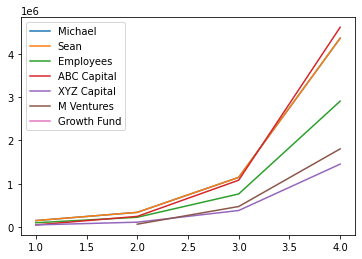

In [36]:
historical_value.plot(kind='line')
plt.show()